In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DIRECTORY = '/content/drive/My Drive/Informatics/Sphere@mail.ru/1_Data_Analysis/Lec_7/'

# Регулярные выражения

**Регулярные выражения** _\(regular expressions, RegExp\)_ — это формальный язык для операций \(поиск, замена и т.п.\) с подстроками в тексте. Иными словами, это способ задать некоторый паттерн и найти / заменить на что-либо те кусочки текста, которые с ним совпадают.

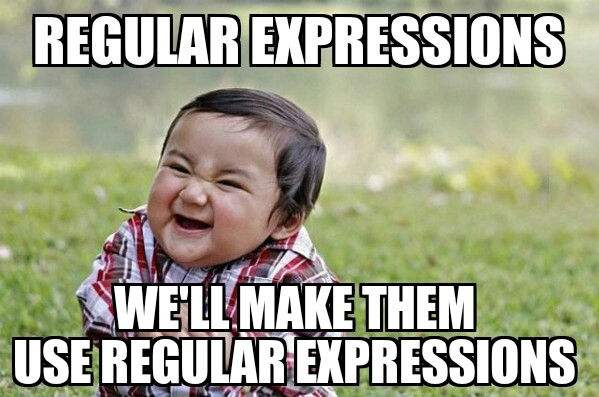
<img width='450px' src="images/use-regex.jpg"></img>

Некоторые люди, когда сталкиваются с проблемой, думают:

    «Я знаю, я решу её с помощью регулярных выражений.»

Теперь у них **ДВЕ** проблемы.

## Что почитать и посмотреть?

1. Хороший [«быстрый старт»](https://tproger.ru/translations/regular-expression-python/) с задачками от TProger.
2. Отличный [туториал](https://habr.com/post/349860/) с задачками на Хабре.
3. Регулярные выражения за 20 минут [видео на YouTube](https://www.youtube.com/watch?v=_pLpx6btq6U).
4. [Документация](https://docs.python.org/3/library/re.html) к стандартной библиотеке.

In [ ]:
import re

Отладчики регулярных выражений:
* https://www.debuggex.com/ ;
* https://regex101.com/ .

`bash`-утилиты, использующие регулярные выражения: [`sed`](https://losst.ru/komanda-sed-linux), [`grep`](https://losst.ru/gerp-poisk-vnutri-fajlov-v-linux).

`IDE -> Find & Replace -> RegExp`

### re.search

Эта функция, ищет заданный шаблон в **любом** месте строки, но возвращает только первое найденное совпадение. 

Аргументы: что найти, где найти.

In [ ]:
re.search(r'cat', 'the fat cat is on the mat')

<_sre.SRE_Match object; span=(8, 11), match='cat'>

In [ ]:
re.search(r'cat', 'the fat cat is on the mat').group(0)

'cat'

### re.findall

Эта функция возвращает список **всех** найденных совпадений в любом месте строки. Аргументы у нее те же, что и у предыдущей функции.

**Замечание:** если вы уверены, что в строке только одно вхождение, предпочитайте `re.search`.

In [ ]:
re.findall(r'the', 'the fat cat is on the mat')

['the', 'the']

### re.sub

Эта функция ищет шаблон в строке и заменяет его на указанную подстроку. Если шаблон не найден, строка остается неизменной.

Аргументы: что заменить; на что заменить; где заменить.

Заменяются все подстроки, которые нашлись по шаблону.

In [ ]:
re.sub(r'the', 'my', 'the fat cat is on the mat')

'my fat cat is on my mat'

### Как задать регулярное выражение?

* `\d` – любая цифра (`[0-9]`);
* `\w` – любая цифра, любая латинская буква или символ `_` (`[0-9a-zA-Z_]`);
* `\s` – любой пробельный символ;
* `[...]` – любой из перечисленных символов, например, `[12345]` (или диапазоны, см. выше);
* `[^...]` – любой символ кроме перечисленных;
* `^` – символ начала строки;
* `$` – символ конца строки;
* `\b` – граница слова.

In [ ]:
# найти все слова из 3-х букв, кончающиеся на at

re.findall(r'\b\wat\b', 'the fat cat is on the mat')

['fat', 'cat', 'mat']

In [ ]:
# найти слово из 3-х букв, кончающееся на at и стоящее в конце строки

re.findall(r'\b\wat$', 'the fat cat is on the mat')

['mat']

Группировка выражений выполняется с поомощью операторов `(...)` и `|`.

In [ ]:
# найти все слова из 3-х букв, начинающиеся или заканчивающиеся с символа t

re.findall(r'\b(t\w\w|\w\wt)\b', 'the fat cat is on the mat')

['the', 'fat', 'cat', 'the', 'mat']

Кроме того, можно задавать длину строки, которую мы ищем:

* `?` — предыдущий символ/группа может быть, а может не быть;
* `+` — предыдущий символ/группа может повторяться 1 и более раз;
* `*` — предыдущий символ/группа может повторяться 0 и более раз;
* `{n,m}` — предыдущий символ/группа может повторяться от от n до m включительно;
* `{n,}` — предыдущий символ/группа в скобках может повторяться n и более раз;
* `{,m}` — предыдущий символ/группа может повторяться до m раз;
* `{n}` — предыдущий символ/группа повторяется n раз.

In [ ]:
# найти все слова из 2-х букв

re.findall(r'\b\w{2}\b', 'the fat cat is on the mat')

['is', 'on']

In [ ]:
# найти все слова из 3-х букв, начинающиеся или заканчивающиеся с символа t

re.findall(r'\b(t\w{2}|\w{2}t)\b', 'the fat cat is on the mat')

['the', 'fat', 'cat', 'the', 'mat']

### Еще несколько примеров

Найти число с плавающей точкой

In [ ]:
re.search('\d+(\.\d+)?', '123')

<_sre.SRE_Match object; span=(0, 3), match='123'>

In [ ]:
re.search('\d+(\.\d+)?', '12.3')

<_sre.SRE_Match object; span=(0, 4), match='12.3'>

In [ ]:
re.search('\d+(\.\d+)?', '12.')

<_sre.SRE_Match object; span=(0, 2), match='12'>

Определение языка: украинский или русский

In [ ]:
records = [
    'Знову до справи: як отримати роботу після тривалої перерви',
    'Гендерные «качели»: карьерные провалы и зарплатная недостаточность',
    'Агроперспективні пропозиції на ринку праці: 15 актуальних вакансій',
    'Переговори: як досягти бажаного результату?',
    'Не досягненнями єдиними: як хобі допоможе отримати роботу',
    'Работа в рекламе: три неочевидные профессии',
]

In [ ]:
def is_ukraine(s):
    is_ok = re.search(r'\b[а-я]*[іїє][а-я]*\b', s, flags=re.IGNORECASE) is not None
    is_ok = is_ok or re.search(r'\b(як|де)\b', s, flags=re.IGNORECASE) is not None
    return is_ok

In [ ]:
for s in records:
    print(is_ukraine(s), s, sep='\t')

True	Знову до справи: як отримати роботу після тривалої перерви
False	Гендерные «качели»: карьерные провалы и зарплатная недостаточность
True	Агроперспективні пропозиції на ринку праці: 15 актуальних вакансій
True	Переговори: як досягти бажаного результату?
True	Не досягненнями єдиними: як хобі допоможе отримати роботу
False	Работа в рекламе: три неочевидные профессии


Удаление лишней обвязки

In [ ]:
s = '''
<script>
    window._io_config = window._io_config || {};
    window._io_config["0.2.0"] = window._io_config["0.2.0"] || [];
    window._io_config["0.2.0"].push({
      page_url: window.location.href,
      page_url_canonical: "https://perito-burrito.com/posts/russia-2020",
      page_title: "Как 2020 год навсегда изменит путешествия по России",
      page_type: "article",
      page_language: "en",
      article_authors: ["Саша Воробьев"],
      article_categories: ["Россия","Советы"],
      article_word_count: "1731",
      article_publication_date: "Mon, 27 Jul 2020 10:04:08 +0000"
    });
</script>
'''

print(s)


<script>
    window._io_config = window._io_config || {};
    window._io_config["0.2.0"] = window._io_config["0.2.0"] || [];
    window._io_config["0.2.0"].push({
      page_url: window.location.href,
      page_url_canonical: "https://perito-burrito.com/posts/russia-2020",
      page_title: "Как 2020 год навсегда изменит путешествия по России",
      page_type: "article",
      page_language: "en",
      article_authors: ["Саша Воробьев"],
      article_categories: ["Россия","Советы"],
      article_word_count: "1731",
      article_publication_date: "Mon, 27 Jul 2020 10:04:08 +0000"
    });
</script>



In [ ]:
r = re.search(r'push\((.*?)\);', s, flags=re.DOTALL).group(1)
r = r.strip('\n{}')

print(r)

      page_url: window.location.href,
      page_url_canonical: "https://perito-burrito.com/posts/russia-2020",
      page_title: "Как 2020 год навсегда изменит путешествия по России",
      page_type: "article",
      page_language: "en",
      article_authors: ["Саша Воробьев"],
      article_categories: ["Россия","Советы"],
      article_word_count: "1731",
      article_publication_date: "Mon, 27 Jul 2020 10:04:08 +0000"
    


# Структура URL

http://www.example.com:80/path/to/myfile.html?key1=value1&key2=value2#SomewhereInTheDocument

<img width='480px' src="https://mdn.mozillademos.org/files/8013/mdn-url-protocol@x2.png"></img>
<img width='480px' src="https://mdn.mozillademos.org/files/8015/mdn-url-protocol@x2.png"></img>
<img width='480px' src="https://mdn.mozillademos.org/files/8017/mdn-url-protocol@x2.png"></img>
<img width='480px' src="https://mdn.mozillademos.org/files/8019/mdn-url-protocol@x2.png"></img>
<img width='480px' src="https://mdn.mozillademos.org/files/8021/mdn-url-protocol@x2.png"></img>
<img width='480px' src="https://mdn.mozillademos.org/files/8023/mdn-url-protocol@x2.png"></img>

https://developer.mozilla.org/ru/docs/Learn/Understanding_URLs

In [ ]:
from urllib.parse import urlparse, parse_qsl, parse_qs

url = "http://www.example.com:80/path/to/myfile.html?key1=value1&key2=value2#SomewhereInTheDocument"
url_parsed = urlparse(url)
url_parsed

ParseResult(scheme='http', netloc='www.example.com:80', path='/path/to/myfile.html', params='', query='key1=value1&key2=value2', fragment='SomewhereInTheDocument')

In [ ]:
url_parsed.path

'/path/to/myfile.html'

In [ ]:
dict(parse_qsl(url_parsed.query))

{'key1': 'value1', 'key2': 'value2'}

# Типы HTTP запросов и ответов

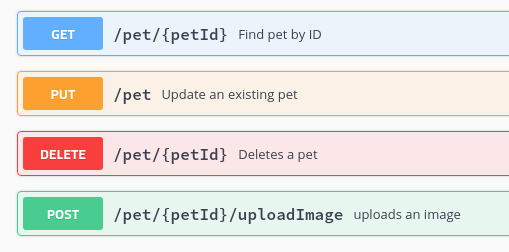
<img width='500px' src="images/swagger-petstore-endpoint-methods.png"></img>

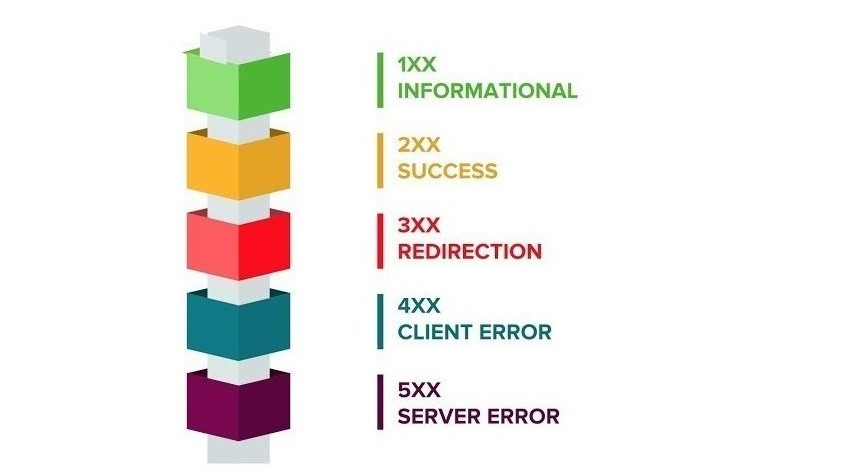
<img width='800px' src="images/responses.jpg"></img>

Табличка с типами ответов: [клац раз](https://www.steveschoger.com/status-code-poster/img/status-code.png) и [клац два](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%BA%D0%BE%D0%B4%D0%BE%D0%B2_%D1%81%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D1%8F_HTTP).

[Документация](http://docs.python-requests.org/) по библиотеке requests.

In [ ]:
import requests

Пример: [oshi.at](https://oshi.at/) (аналог transfer.sh)

In [ ]:
r_put = requests.put('https://oshi.at/arg.txt', data='Bonjour le monde!')
r_put

<Response [200]>

In [ ]:
r_put.ok, r_put.status_code

(True, 200)

In [ ]:
print(r_put.text)


https://oshi.at/a/7147d76f4ffc11943680a513ea9ebf08820d9f38 [Admin]
https://oshi.at/xqLBSK [CDN download]
https://oshi.at/xqLBSK [Direct IP download]
http://oshiatwowvdbshka.onion/xqLBSK [Tor download]




In [ ]:
r_get = requests.get('https://oshi.at/xqLBSK')
r_get

<Response [200]>

In [ ]:
r_get.text

'Bonjour le monde!'

Пример: [controlc.com](https://controlc.com/) (аналог pastebin.com)

In [ ]:
page = requests.post('https://controlc.com/index.php?act=submit', data={
    'subdomain': '',
    'antispam': 1,
    'website': '',
    'paste_title': 'Заметка',
    'input_text': 'Привет, Техносфера!',
    'timestamp': 'ba68753935524ba7096650590c86633b',
    'paste_password': '',
    'code': 0,
}, headers={'accept-encoding': 'identity', 'referer': 'https://controlc.com/'})
page

<Response [200]>

In [ ]:
from lxml import html as lhtml

tree = lhtml.fromstring(page.text)
urls = tree.xpath('//a[text()="Paste submitted successfully! (view)"]/attribute::href')
print(*urls)

# Работа с JSON

In [ ]:
import json

prepare token: https://developer.spotify.com/console/get-track/?id=3n3Ppam7vgaVa1iaRUc9Lp

In [ ]:
with open(DIRECTORY + 'spotify-api-token.key', mode='r') as f_key:
    spotify_api_token = f_key.readline().strip()
    

class SpotifyAPI:    
    def __init__(self, token):
        self._token = token

    def get_track_info(self, track_id, market='US'):
        # посылаем get запрос, указываем аргументы и заголовки
        ret = requests.get("https://api.spotify.com/v1/tracks/{}".format(track_id),
                           params={'market': market,},
                           headers={'Authorization': f'Bearer {self._token}'})
        return ret


spotify = SpotifyAPI(spotify_api_token)
r = spotify.get_track_info('7gVGBGI4ZqvkYBlh2LdrQy', market='RU')
r.status_code

401

In [ ]:
print(r.text)

{
  "error": {
    "status": 401,
    "message": "The access token expired"
  }
}


In [ ]:
answer = json.loads(r.text)
type(answer)

dict

In [ ]:
answer = r.json()
type(answer)

dict

In [ ]:
answer_cut = {
    'artist':   answer['artists'][0]['name'],
    'name':     answer['name'],
    'duration': answer['duration_ms'] / 1000.0,
    'href':     answer['href'],
    'id':       answer['id'],
    'preview':  answer['preview_url'],
}
answer_cut

{'artist': 'Foals',
 'name': 'Exits',
 'duration': 357.419,
 'href': 'https://api.spotify.com/v1/tracks/7gVGBGI4ZqvkYBlh2LdrQy',
 'id': '7gVGBGI4ZqvkYBlh2LdrQy',
 'preview': 'https://p.scdn.co/mp3-preview/810483a6e312bb1b3b8a28db70279c568bc6b97a?cid=774b29d4f13844c495f206cafdad9c86'}

In [ ]:
filename = urlparse(answer_cut['preview']).path.rsplit('/', 1)[-1] + '.mp3'

# NOTE: используем атрибут content для бинарных данных

with open(filename, 'wb') as f:
    data = requests.get(answer_cut['preview']).content
    f.write(data)
    
print(filename)

810483a6e312bb1b3b8a28db70279c568bc6b97a.mp3


In [ ]:
import IPython.display as ipd

ipd.Audio(filename) 

In [ ]:
# компактно сериализуем json в строку

json.dumps(answer_cut)

'{"artist": "Foals", "name": "Exits", "duration": 357.419, "href": "https://api.spotify.com/v1/tracks/7gVGBGI4ZqvkYBlh2LdrQy", "id": "7gVGBGI4ZqvkYBlh2LdrQy", "preview": "https://p.scdn.co/mp3-preview/810483a6e312bb1b3b8a28db70279c568bc6b97a?cid=774b29d4f13844c495f206cafdad9c86"}'

In [ ]:
# pretty print для json

print(json.dumps(answer_cut, indent=4, sort_keys=True))

{
    "artist": "Foals",
    "duration": 357.419,
    "href": "https://api.spotify.com/v1/tracks/7gVGBGI4ZqvkYBlh2LdrQy",
    "id": "7gVGBGI4ZqvkYBlh2LdrQy",
    "name": "Exits",
    "preview": "https://p.scdn.co/mp3-preview/810483a6e312bb1b3b8a28db70279c568bc6b97a?cid=774b29d4f13844c495f206cafdad9c86"
}


In [ ]:
with open('/tmp/answer_cut.json', mode='w') as f_json:
    json.dump(answer_cut, f_json)

In [ ]:
with open('/tmp/answer_cut.json', mode='r') as f_json:
    answer_cut = json.load(f_json)

answer_cut

{'artist': 'Foals',
 'name': 'Exits',
 'duration': 357.419,
 'href': 'https://api.spotify.com/v1/tracks/7gVGBGI4ZqvkYBlh2LdrQy',
 'id': '7gVGBGI4ZqvkYBlh2LdrQy',
 'preview': 'https://p.scdn.co/mp3-preview/810483a6e312bb1b3b8a28db70279c568bc6b97a?cid=774b29d4f13844c495f206cafdad9c86'}

In [ ]:
!cat /tmp/answer_cut.json

{"artist": "Foals", "name": "Exits", "duration": 357.419, "href": "https://api.spotify.com/v1/tracks/7gVGBGI4ZqvkYBlh2LdrQy", "id": "7gVGBGI4ZqvkYBlh2LdrQy", "preview": "https://p.scdn.co/mp3-preview/810483a6e312bb1b3b8a28db70279c568bc6b97a?cid=774b29d4f13844c495f206cafdad9c86"}

In [ ]:
!cat /tmp/answer_cut.json | python -m json.tool

{
    "artist": "Foals",
    "name": "Exits",
    "duration": 357.419,
    "href": "https://api.spotify.com/v1/tracks/7gVGBGI4ZqvkYBlh2LdrQy",
    "id": "7gVGBGI4ZqvkYBlh2LdrQy",
    "preview": "https://p.scdn.co/mp3-preview/810483a6e312bb1b3b8a28db70279c568bc6b97a?cid=774b29d4f13844c495f206cafdad9c86"
}


In [ ]:
!cat /tmp/answer_cut.json | jq .

{
  "artist": "Foals",
  "name": "Exits",
  "duration": 357.419,
  "href": "https://api.spotify.com/v1/tracks/7gVGBGI4ZqvkYBlh2LdrQy",
  "id": "7gVGBGI4ZqvkYBlh2LdrQy",
  "preview": "https://p.scdn.co/mp3-preview/810483a6e312bb1b3b8a28db70279c568bc6b97a?cid=774b29d4f13844c495f206cafdad9c86"
}


## А можно ли как-то ускорить процесс обкачки?

<span style="color:blue;font-weight:bold">Вопрос:</span> какая разница между процессами и потоками (threads)?

Глобальная блокировка интерпретатора ( global interpreter lock , **GIL** ) Python. Если два или более потока попытаются манипулировать одним и тем же объектом в одно и то же время, то неизбежно возникнут проблемы. Глобальная блокировка интерпретатора исправляет это. В любой момент времени действия может выполнять только один поток. Python автоматически переключается между потоками, когда в этом возникает необходимость.

GIL в Python реализован как обычный lock.

Скачивание данных через библиотеку requsets – I/O операция, поэтому большую часть времени процессор не выполняет никаких задач, потому что ждёт, пока данные придут по сети.

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
%%time

n_post_first, n_post_final = 349000, 349200


pages = [requests.get('https://habr.com/post/{}/'.format(post_id))
         for post_id in tqdm(range(n_post_first, n_post_final, 2))]


CPU times: user 2.02 s, sys: 153 ms, total: 2.18 s
Wall time: 2min 32s


In [ ]:
from multiprocessing.dummy import Pool as ThreadPool

In [ ]:
%%time

n_post_first, n_post_final = 349000, 349200

def get_habr_post(post_id):
    return requests.get('https://habrahabr.ru/post/{}/'.format(post_id))

with ThreadPool(10) as pool:
    pages = pool.map(get_habr_post, range(n_post_first, n_post_final, 2))

pool.join()   # same as wait pid

CPU times: user 3.17 s, sys: 221 ms, total: 3.39 s
Wall time: 22.7 s


In [ ]:
from multiprocessing import Pool

In [ ]:
%%time

n_post_first, n_post_final = 349000, 349200

def get_habr_post(post_id):
    return requests.get('https://habrahabr.ru/post/{}/'.format(post_id))

with Pool(processes=10) as pool:
    pages = pool.map(get_habr_post, range(n_post_first, n_post_final, 2))

pool.join()   # same as wait pid

CPU times: user 73.9 ms, sys: 103 ms, total: 177 ms
Wall time: 22.7 s


# robots.txt и sitemap.xml

1. Валидаторы:
    * https://webmaster.yandex.ru/tools/robotstxt/
    * https://technicalseo.com/seo-tools/robots-txt/
2. Все о robots.txt:
    * https://help.mail.ru/webmaster/indexing/robots.txt
    * https://yandex.ru/support/webmaster/controlling-robot/
    
**Пример 1:** https://tproger.ru/robots.txt

**Пример 2:** https://tjournal.ru/robots.txt

# Парсинг HTML-страничек

<img width='800px' src="https://q-bit.biz/uploads/article/Tegs_1539003896.png"></img>

Example: https://www.kinopoisk.ru/film/689066/

## lxml

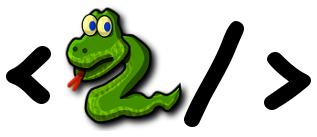
<img width = '250px' src="images/lxml.png">

https://lxml.de/tutorial.html

In [ ]:
from lxml import etree, html as lhtml

In [ ]:
tree = lhtml.fromstring(open(DIRECTORY + 'data/689066_2.html', 'r').read())

Так как html и xml имеют древовидную структуру, до любого элемента всегда существет единственный путь, XPath.

https://www.w3schools.com/xml/xpath_intro.asp

```bash
pip install cssselect   # для подержки CSS селекторов
```

In [ ]:
!pip install cssselect

In [ ]:
film_info = {
    'title': tree.xpath('//h1[@itemprop="name"]/span/text()')[0],
    'title-original': tree.xpath('//span[starts-with(@class, "styles_originalTitle__")]')[0].text,
    'rating': float(tree.cssselect('a.film-rating-value')[0].text),   # поддержка CSS-селекторов
#     'rating': float(tree.xpath('//a[contains(@class, "film-rating-value")]/text()')[0])
}

film_info

{'rating': 7.763,
 'title': 'Стражи Галактики',
 'title-original': 'Guardians of the Galaxy'}

Найдем ссылку на просмотр фильма.

In [ ]:
watch = tree.xpath('//a[contains(@class, "kinopoisk-watch-online-button")]/attribute::href')
watch

['https://hd.kinopoisk.ru/film/4a297ba39cb704fa9a81855f76ab1d73?from=button_online&watch=']

In [ ]:
film_info['watch'] = watch
film_info

{'rating': 7.763,
 'title': 'Стражи Галактики',
 'title-original': 'Guardians of the Galaxy',
 'watch': ['https://hd.kinopoisk.ru/film/4a297ba39cb704fa9a81855f76ab1d73?from=button_online&watch=']}

Вытащим ссылки на постеры.

In [ ]:
image = tree.xpath('//img[contains(@class, "film-poster")]//attribute::srcset')
image

['//avatars.mds.yandex.net/get-kinopoisk-image/1773646/2e6ab20b-7cf1-49e7-b465-bd5a71c13fa3/300x450 1x, //avatars.mds.yandex.net/get-kinopoisk-image/1773646/2e6ab20b-7cf1-49e7-b465-bd5a71c13fa3/600x900 2x']

In [ ]:
image = tree.xpath('//img[contains(@class, "film-poster")]//attribute::srcset')[0]
image = image.split(', ')
image = ['https:' + img.split(' ', 1)[0] for img in image]
image

['https://avatars.mds.yandex.net/get-kinopoisk-image/1773646/2e6ab20b-7cf1-49e7-b465-bd5a71c13fa3/300x450',
 'https://avatars.mds.yandex.net/get-kinopoisk-image/1773646/2e6ab20b-7cf1-49e7-b465-bd5a71c13fa3/600x900']

In [ ]:
film_info['posters'] = image
film_info

{'posters': ['https://avatars.mds.yandex.net/get-kinopoisk-image/1773646/2e6ab20b-7cf1-49e7-b465-bd5a71c13fa3/300x450',
  'https://avatars.mds.yandex.net/get-kinopoisk-image/1773646/2e6ab20b-7cf1-49e7-b465-bd5a71c13fa3/600x900'],
 'rating': 7.763,
 'title': 'Стражи Галактики',
 'title-original': 'Guardians of the Galaxy',
 'watch': ['https://hd.kinopoisk.ru/film/4a297ba39cb704fa9a81855f76ab1d73?from=button_online&watch=']}

Распарсим описание фильма.

In [ ]:
info_desc = tree.xpath('//div[starts-with(@class, "styles_synopsisSection")]//text()')
info_desc

['Отважному путешественнику Питеру Квиллу попадает в руки таинственный артефакт, принадлежащий могущественному и безжалостному злодею Ронану, строящему коварные планы по захвату Вселенной. Питер оказывается в центре межгалактической охоты, где жертва — он сам.',
 'Единственный способ спасти свою жизнь — объединиться с четверкой нелюдимых изгоев: воинственным енотом по кличке Ракета, человекоподобным деревом Грутом, смертельно опасной Гаморой и одержимым жаждой мести Драксом, также известным как Разрушитель. Когда Квилл понимает, какой силой обладает украденный артефакт и какую опасность он представляет для вселенной, одиночка пойдет на все, чтобы сплотить случайных союзников для решающей битвы за судьбу галактики.']

In [ ]:
info_desc = tree.xpath('//div[starts-with(@class, "styles_synopsisSection")]//text()')

film_info['description'] = '\n'.join(info_desc)
film_info

{'description': 'Отважному путешественнику Питеру Квиллу попадает в руки таинственный артефакт, принадлежащий могущественному и безжалостному злодею Ронану, строящему коварные планы по захвату Вселенной. Питер оказывается в центре межгалактической охоты, где жертва — он сам.\nЕдинственный способ спасти свою жизнь — объединиться с четверкой нелюдимых изгоев: воинственным енотом по кличке Ракета, человекоподобным деревом Грутом, смертельно опасной Гаморой и одержимым жаждой мести Драксом, также известным как Разрушитель. Когда Квилл понимает, какой силой обладает украденный артефакт и какую опасность он представляет для вселенной, одиночка пойдет на все, чтобы сплотить случайных союзников для решающей битвы за судьбу галактики.',
 'posters': ['https://avatars.mds.yandex.net/get-kinopoisk-image/1773646/2e6ab20b-7cf1-49e7-b465-bd5a71c13fa3/300x450',
  'https://avatars.mds.yandex.net/get-kinopoisk-image/1773646/2e6ab20b-7cf1-49e7-b465-bd5a71c13fa3/600x900'],
 'rating': 7.763,
 'title': 'Стр

## Beautiful Soup
https://www.crummy.com/software/BeautifulSoup/bs4/doc/

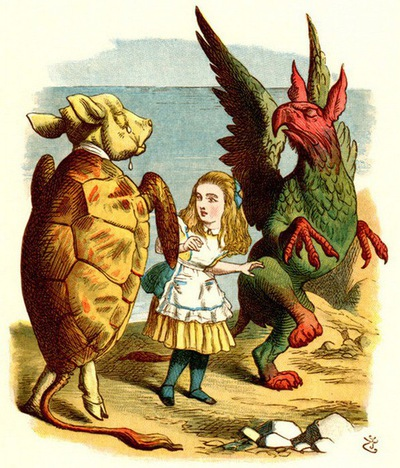
<img width = '330px' src="images/bsoup.jpg">

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(open(DIRECTORY + 'data/689066_2.html', 'r').read(), 'html.parser')

In [ ]:
soup = BeautifulSoup(open(DIRECTORY + 'data/689066_2.html', 'r').read(), 'lxml')

In [ ]:
from operator import attrgetter, itemgetter

### Соберем основную информацию о фильме

In [ ]:
film_info = {
    'title': soup.find('h1', itemprop='name').find('span').text,
    'title-original': soup.find('span', class_=lambda s: s and s.startswith('styles_originalTitle__')).text,
    'rating': float(soup.select_one('a.film-rating-value').text)   # поддержка CSS-селекторов
}

film_info

{'rating': 7.763,
 'title': 'Стражи Галактики',
 'title-original': 'Guardians of the Galaxy'}

In [ ]:
desc = soup.find('div', itemprop='description')
desc = soup.find('div', class_=lambda s: s and s.startswith("styles_synopsisSection")).find_all('p')
desc

[<p class="styles_paragraph__2Otvx" data-tid="7044a75b">Отважному путешественнику Питеру Квиллу попадает в руки таинственный артефакт, принадлежащий могущественному и безжалостному злодею Ронану, строящему коварные планы по захвату Вселенной. Питер оказывается в центре межгалактической охоты, где жертва — он сам.</p>,
 <p class="styles_paragraph__2Otvx" data-tid="7044a75b">Единственный способ спасти свою жизнь — объединиться с четверкой нелюдимых изгоев: воинственным енотом по кличке Ракета, человекоподобным деревом Грутом, смертельно опасной Гаморой и одержимым жаждой мести Драксом, также известным как Разрушитель. Когда Квилл понимает, какой силой обладает украденный артефакт и какую опасность он представляет для вселенной, одиночка пойдет на все, чтобы сплотить случайных союзников для решающей битвы за судьбу галактики.</p>]

In [ ]:
desc[0].text

'Отважному путешественнику Питеру Квиллу попадает в руки таинственный артефакт, принадлежащий могущественному и безжалостному злодею Ронану, строящему коварные планы по захвату Вселенной. Питер оказывается в центре межгалактической охоты, где жертва — он сам.'

In [ ]:
film_info['description'] = '\n'.join(map(attrgetter('text'), desc))
film_info

{'description': 'Отважному путешественнику Питеру Квиллу попадает в руки таинственный артефакт, принадлежащий могущественному и безжалостному злодею Ронану, строящему коварные планы по захвату Вселенной. Питер оказывается в центре межгалактической охоты, где жертва — он сам.\nЕдинственный способ спасти свою жизнь — объединиться с четверкой нелюдимых изгоев: воинственным енотом по кличке Ракета, человекоподобным деревом Грутом, смертельно опасной Гаморой и одержимым жаждой мести Драксом, также известным как Разрушитель. Когда Квилл понимает, какой силой обладает украденный артефакт и какую опасность он представляет для вселенной, одиночка пойдет на все, чтобы сплотить случайных союзников для решающей битвы за судьбу галактики.',
 'rating': 7.763,
 'title': 'Стражи Галактики',
 'title-original': 'Guardians of the Galaxy'}

### Извлечем таблицу

In [ ]:
import pandas as pd

In [ ]:
header = soup.find('h3', class_="film-page-section-title")
table = header.next_sibling
rows = table.find_all('div', recursive=False)

len(rows)

23

In [ ]:
data = []

for row in rows:
    cols = map(lambda x: x.text, row.find_all('div'))
    data.append(cols)

data = pd.DataFrame(data)
data

0  ...                                                  2
0    Год производства  ...                                               None
1              Страна  ...                                               None
2                Жанр  ...           фантастика, боевик, приключения, комедия
3              Слоган  ...  «Мстители спасают лишь Землю бренную, а эти ре...
4            Режиссер  ...                                               None
5            Сценарий  ...                                               None
6            Продюсер  ...                                               None
7            Оператор  ...                                               None
8          Композитор  ...                                               None
9            Художник  ...                                               None
10             Монтаж  ...                                               None
11             Бюджет  ...                                               None
12        Сборы в США  ...                                               None
13       Сборы в мире  ...                                               None
14            Зрители  ...                                               None
15     Сборы в России  ...                                               None
16  Премьера в Росcии  ...                                               None
17    Премьера в мире  ...                                               None
18       Релиз на DVD  ...          2 декабря 2014, «Уолт Дисней Компани СНГ»
19   Релиз на Blu-ray  ...          2 декабря 2014, «Уолт Дисней Компани СНГ»
20            Возраст  ...                                               None
21       Рейтинг MPAA  ...                                               None
22              Время  ...                                   121 мин. / 02:01

[23 rows x 3 columns]

Пример с таблицей и pandas

In [ ]:
import requests

page = requests.get(
    'https://www.championat.com/football/_russiapl/tournament/2973/statistic/player/bombardir/',
    headers={
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:82.0) Gecko/20100101 Firefox/82.0', 
    },
)
page

<Response [200]>

In [ ]:
pd.read_html(page.text)[0].head()

Unnamed: 0  ...  Игры  [{"name":"game","empty":"first"}]
0           1  ...                                       28
1           2  ...                                       28
2           3  ...                                       28
3           4  ...                                       29
4           5  ...                                       30

[5 rows x 10 columns]

### Пройдемся по спискам актеров...

In [ ]:
actors, actors_dub = soup.find(class_="film-crew-block").find_all('div', {'data-tid': True})
actors, actors_dub = map(lambda s: s.find('ul'), [actors, actors_dub])

In [ ]:
[row.text for row in actors.children]

['Крис Пратт',
 'Зои Салдана',
 'Дэйв Батиста',
 'Брэдли Купер',
 'Вин Дизель',
 'Ли Пейс',
 'Майкл Рукер',
 'Карен Гиллан',
 'Гленн Клоуз',
 'Джимон Хонсу']

In [ ]:
[row.text for row in actors_dub.children]

['Андрей Зайцев',
 'Мария Цветкова-Овсянникова',
 'Максим Сергеев',
 'Сергей Куницкий',
 'Вин Дизель']

### Обкачаем картинки

https://www.kinopoisk.ru/film/689066/stills/

In [ ]:
soup = BeautifulSoup(open(DIRECTORY + 'data/689066_stills_2.html', 'r').read(), 'html.parser')

In [ ]:
list(map(lambda s: s.attrs['src'], soup.find('table', class_='fotos').find_all("img")))[:10]

['https://st.kp.yandex.net/images/kadr/sm_2802088.jpg',
 'https://st.kp.yandex.net/images/kadr/sm_2802087.jpg',
 'https://st.kp.yandex.net/images/kadr/sm_2802086.jpg',
 'https://st.kp.yandex.net/images/kadr/sm_2802085.jpg',
 'https://st.kp.yandex.net/images/kadr/sm_2802084.jpg',
 'https://st.kp.yandex.net/images/kadr/sm_2802083.jpg',
 'https://st.kp.yandex.net/images/kadr/sm_2802082.jpg',
 'https://st.kp.yandex.net/images/kadr/sm_2802081.jpg',
 'https://st.kp.yandex.net/images/kadr/sm_2751304.jpg',
 'https://st.kp.yandex.net/images/kadr/sm_2485201.jpg']

# О проблемах...

## Кодировки

In [ ]:
page = requests.get('https://www.povarenok.ru/recipes/show/163694/')

In [ ]:
print(page.content.decode('utf8')[:315])

UnicodeDecodeError: ignored

In [ ]:
print(page.content.decode('cp1251')[:315])

  

  <!DOCTYPE html>
<html lang="ru">
<head>
  <meta http-equiv="Content-Type" content="text/html; charset=windows-1251" />
  <title>Карамелизированная рыба – кулинарный рецепт</title>
  <meta name='yandex-verification' content='70aa299668ac52e5' />
  <meta name="mailru-verification" content="9d7024ca85879691" />


In [ ]:
print(page.text[:315])

  

  <!DOCTYPE html>
<html lang="ru">
<head>
  <meta http-equiv="Content-Type" content="text/html; charset=windows-1251" />
  <title>Карамелизированная рыба – кулинарный рецепт</title>
  <meta name='yandex-verification' content='70aa299668ac52e5' />
  <meta name="mailru-verification" content="9d7024ca85879691" />


<img width='800px' src="https://w3techs.com/diagram/history_overview/character_encoding/ms/y">

https://w3techs.com/technologies/history_overview/character_encoding/ms/y

Обычно информация о кодировке расположена здесь:

```html
<meta http-equiv="Content-Type" content="text/html; charset=windows-1251">

<meta charset="windows-1251">
```

## Заголовки

https://www.dafont.com/

In [ ]:
page = requests.get('https://www.dafont.com/')

len(page.content)

0

Библиотека для подстановки UserAgent: https://pypi.org/project/fake-useragent/

Что у меня за браузер: https://developers.whatismybrowser.com/useragents/parse/?analyse-my-user-agent=yes

In [ ]:
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6)'
                         'AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.1 Safari/605.1.15'}
page = requests.get('https://www.dafont.com/', headers=headers)

len(page.content)

20346

## Cookie

Cookie (куки) — это небольшие текстовые файлы, в которые браузер записывает данные с посещенных вами сайтов. Файлы cookie позволяют сайтам «запоминать» своих посетителей, например, чтобы каждый раз не переспрашивать их логин и пароль.

chrome://settings/cookies/detail?site=sphere.mail.ru (sessionid_gtp)

https://sphere.mail.ru/people/?q=BD-11

In [ ]:
page = requests.get('https://sphere.mail.ru/people/', params={'q': 'BD-11'})
page.status_code

200

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')

table = soup.find('div', class_='people-list')
table is not None

False

In [ ]:
print(page.url)

https://sphere.mail.ru/pages/index/?next=/people/%3Fq%3DBD-11#auth


In [ ]:
for page_ in page.history:
    print(page_.status_code, page_.url, sep='\t')

print(page.status_code, page.url, sep='\t')

302	https://sphere.mail.ru/people/?q=BD-11
200	https://sphere.mail.ru/pages/index/?next=/people/%3Fq%3DBD-11#auth


In [ ]:
with open('sphere-cookies.json', mode='r') as f_cookies:
    cookies = json.load(f_cookies)

page = requests.get('https://sphere.mail.ru/people/', params={'q': 'BD-11'}, cookies=cookies)
page.status_code

FileNotFoundError: ignored

In [ ]:
print(page.url)

https://sphere.mail.ru/pages/index/?next=/people/%3Fq%3DBD-11#auth


In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')

table = soup.find('div', class_='people-list')
table is not None

False

In [ ]:
from urllib.parse import urlparse

In [ ]:
rows = table.find('table', class_='table-users').find('tbody').find_all('tr')

users = [{'name': row.find('p', class_='realname').text,
          'nick': urlparse(row.find('p', class_='username').find('a').attrs['href']).\
              path.split('/')[2],
          'type': row.find('span', class_='user-group').text,
          'power': row.find('td', class_='cell-skill').text,
          'rating': row.find('td', class_='cell-rating').text.strip()}
         for row in rows]

df = pd.DataFrame(users)
df.head(10)

AttributeError: ignored

## Proxy

In [ ]:
def browser_stats_from_yandex(**params):
    page = requests.get('https://yandex.ru/internet/', **params)
    soup = BeautifulSoup(page.content, 'html.parser')

    params = {}
    for e in soup.find('ul', class_='general-info').find_all('li'):
        key = e.find('h3').text
        val = e.find('div', {'class': None})
        val = val.text if val else '–'
        params[key] = val
    return params

In [ ]:
browser_stats_from_yandex()

{'IPv4-адрес': '35.233.134.150',
 'IPv6-адрес': '–',
 'JavaScript отключен': 'В вашем браузере отсутствует или выключена поддержка JavaScript.',
 'Браузер': 'Неизвестный браузер',
 'Разрешение экрана': '–',
 'Регион': '–'}

http://spys.one/proxys/DE/

In [ ]:
proxies = { 'https': '62.171.177.80:3129', }

browser_stats_from_yandex(proxies=proxies)

{'IPv4-адрес': '62.171.177.80',
 'IPv6-адрес': '–',
 'JavaScript отключен': 'В вашем браузере отсутствует или выключена поддержка JavaScript.',
 'Браузер': 'Неизвестный браузер',
 'Разрешение экрана': '–',
 'Регион': '–'}

In [ ]:
browser_stats_from_yandex(proxies=proxies, headers={'User-Agent': 'TwitterBot'})

{'IPv4-адрес': '62.171.177.80',
 'IPv6-адрес': '–',
 'JavaScript отключен': 'В вашем браузере отсутствует или выключена поддержка JavaScript.',
 'Браузер': 'Twitterbot',
 'Разрешение экрана': '–',
 'Регион': '–'}

## JavaScript

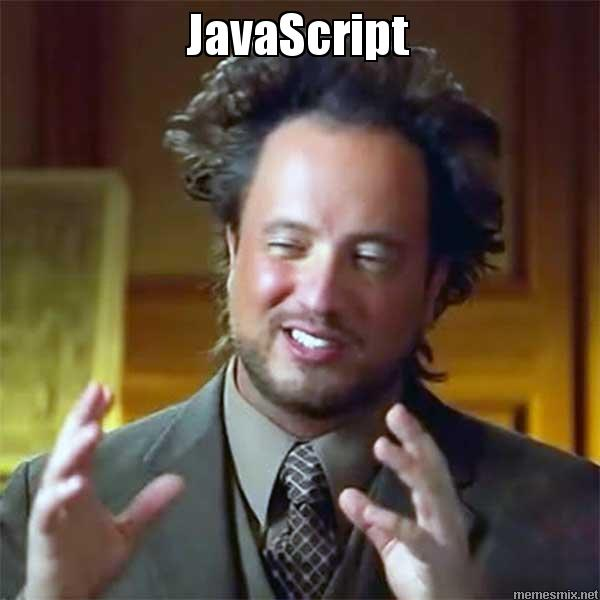
<img width = '350px' src="images/javascript.jpg">

https://www.glamour.ru/trends/5-sposobov-nosit-bryuki-chtoby-byt-samoj-modnoj-etoj-vesnoj

In [ ]:
page = requests.get('https://www.glamour.ru/trends/5-sposobov-nosit-bryuki-chtoby-byt-samoj-modnoj-etoj-vesnoj')
page

<Response [200]>

In [ ]:
print(page.text)

<!DOCTYPE html><html><head><style ng-if="!$root.isHeadlessChrome">.async-hide {opacity: 0 !important;}</style><script>(function(a,s,y,n,c,h,i,d,e){s.className+=' '+y;h.start=1*new Date;
h.end=i=function(){s.className=s.className.replace(RegExp(' ?'+y),'')};
(a[n]=a[n]||[]).hide=h;setTimeout(function(){i();h.end=null},c);h.timeout=c;
})(window,document.documentElement,'async-hide','dataLayer',4000,
{'GTM-NG2GJBS':true});

(function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
(i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
})(window,document,'script','https://www.google-analytics.com/analytics.js','ga');
ga('create', 'UA-3730071-2', 'auto');
ga('require', 'GTM-NG2GJBS');

(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.as

### Selenium

<img width = '500px' src="https://cdn-a.william-reed.com/var/wrbm_gb_food_pharma/storage/images/publications/food-beverage-nutrition/nutraingredients.com/news/research/selenium-may-protect-against-epileptic-seizures-mouse-study-suggests/7690019-1-eng-GB/Selenium-may-protect-against-epileptic-seizures-mouse-study-suggests_wrbm_large.jpg">

http://selenium-python.readthedocs.io/

https://kreisfahrer.gitbooks.io/selenium-webdriver/

In [ ]:
from selenium import webdriver

import html
from time import sleep

ModuleNotFoundError: ignored

In [ ]:
with webdriver.Firefox() as driver:
    sleep(10)
    driver.get("https://mail.ru/")
    sleep(3)

NameError: ignored

In [ ]:
with webdriver.Firefox() as driver:
    sleep(10)
    
    driver.get('https://www.glamour.ru/beauty-news/kunzhutnoe-moloko-novinki-dlya-lica-ot-erborian')
    sleep(1)

    title = driver.find_element_by_tag_name('h1').text
    
    description = driver.find_element_by_xpath('//div[@itemprop="description"]').text

    image = driver.find_element_by_xpath('//meta[@property="og:image"]').get_attribute('content')
    
    rubric = (e.text for e in driver.find_elements_by_class_name('article-detail-top__info-line'))
    rubric = list(filter(None, map(str.lower, rubric)))

    tags = (e.text for e in driver.find_elements_by_xpath('//ul[@class="tag-list__list"]//a[@itemprop="name"]'))
    tags = list(filter(None, map(str.lower, tags)))
    
    info = {
        'title': title,
        'description': description,
        'tags': tags,
        'rubric': rubric,
        'preview': image,
    }
    
info

{'title': 'Кунжутное молоко: новинки для лица от Erborian',
 'description': 'А также приятная акция!',
 'tags': ['пилинг', 'маска для лица', 'erborian'],
 'rubric': ['бьюти новости'],
 'preview': 'https://condenast-media.gcdn.co/glamour/a083be49c45d768932c3f5a0c5be7d52.jpg/116b5db0/c1079x1079x1x0/w2000'}

### А как можно решить эту задачу по-умному?

Идем в консольку браузера 😉

In [ ]:
url_raw = 'https://www.glamour.ru/beauty-news/kunzhutnoe-moloko-novinki-dlya-lica-ot-erborian'

url = urlparse(url_raw).path.rsplit('/', 1)[-1]
url = 'https://api.glamour.ru/article/' + url

page = requests.get(url)
    
tree = page.json()
tree

{'id': 67190,
 'name': 'Кунжутное молоко: новинки для лица от Erborian',
 'name_formatted': 'Кунжутное молоко: новинки для&nbsp;лица от&nbsp;Erborian',
 'preview_image': {'id': 573934,
  'name': '89744560_248315309519574_3644042830260352040_n.jpg',
  'width': 1080,
  'height': 1079,
  'preview_url': 'https://condenast-media.gcdn.co/glamour/a083be49c45d768932c3f5a0c5be7d52.jpg/78feb0e0/o/w200',
  'urls': {'16:9': 'https://condenast-media.gcdn.co/glamour/a083be49c45d768932c3f5a0c5be7d52.jpg/307a1a1f/c1079x607x0x297/w2000',
   '4:3': 'https://condenast-media.gcdn.co/glamour/a083be49c45d768932c3f5a0c5be7d52.jpg/ecdf2f2d/c1080x810x0x135/w2000',
   '3:2': 'https://condenast-media.gcdn.co/glamour/a083be49c45d768932c3f5a0c5be7d52.jpg/488cb464/c1080x720x0x180/w2000',
   '1:1': 'https://condenast-media.gcdn.co/glamour/a083be49c45d768932c3f5a0c5be7d52.jpg/116b5db0/c1079x1079x1x0/w2000'},
  'render_parameters': {'16:9': {'parameters': 'c1079x607x0x297',
    'ratio': '16:9'},
   '4:3': {'parameters

In [ ]:
title = tree['name']

description = tree['preview_text']

image = tree['preview_image']['preview_url']

rubric = [tree['main_tag']['name']]
rubric = list(filter(None, map(str.lower, rubric)))

tags = (r['tag']['name'] for r in tree['tag_elements'])
tags = list(filter(None, map(str.lower, tags)))

info = {
    'title': title,
    'description': description,
    'tags': tags,
    'rubric': rubric,
    'preview': image,
}

info

{'title': 'Кунжутное молоко: новинки для лица от Erborian',
 'description': 'А также приятная акция!',
 'tags': ['erborian', 'маска для лица', 'пилинг'],
 'rubric': ['бьюти новости'],
 'preview': 'https://condenast-media.gcdn.co/glamour/a083be49c45d768932c3f5a0c5be7d52.jpg/78feb0e0/o/w200'}

### А что ещё умеет Selenium?

In [ ]:
import random

def random_sleep(offset=1.5, length=4):
    sleep(random.random() * length + offset)

with webdriver.Firefox() as driver:
    sleep(12)
    
    driver.get("https://music.yandex.ru/artist/184100")
    random_sleep()
    
    # можно исполнять свой javascript код
    driver.execute_script("window.scrollTo(0, 250);")
    random_sleep(0)
    
    # можно использовать CSS-селекторы или XPath
    # лучше использовать Firefox, он лучше подсказывает пути
    # стоит использовать, если путь выглядит лаконичным
    # пример плохого CSS-селектора
    elem = driver.find_element_by_css_selector(
        'div.d-tabs__tab:nth-child(3) > a:nth-child(1)')
    
    # можно кликать по объектам
    # [ переходим на страничку с альбомами группы ]
    elem.click()
    random_sleep()
    
    # можно искать по классам
    albums = driver.find_element_by_class_name('page-artist__albums').\
        find_elements_by_class_name('album_selectable')
    album = albums[3]
    # [ прокручиваем до нужного альбома ]
    driver.execute_script("return arguments[0].scrollIntoView();", album)
    random_sleep()
    # [ переходим на страничку с выбранным альбомом ]
    album.find_element_by_class_name('d-link').click()
    random_sleep()
    
    driver.execute_script("window.scrollTo(0, 340);")
    random_sleep(0)
    
    # [ кликаем на play ]
    play = driver.find_element_by_class_name('button-play__type_album')
    play.click()
    
    # [ прокликиваем на 5 трек ]
    # пример хорошего CSS-селектора
    next_ = driver.find_element_by_css_selector('.d-icon_track-next')
    for i in range(4):
        next_.click()
        random_sleep(1, 1)
        
    # [ выводим информацию о треке ]
    # пример хорошего CSS-селектора
    elem = driver.find_element_by_css_selector('.track__name')
    artist = elem.find_element_by_class_name('track__artists').text
    title = elem.find_element_by_class_name('track__title').text
    
    tracks = driver.find_element_by_css_selector('.page-album__tracks').\
        find_elements_by_class_name('d-track')
    
    for track_i, track in enumerate(tracks, 1):
        if 'd-track_playing' in track.get_attribute("class").split(' '):
            break
    
    print("Now playing: {} - {}".format(artist, title))
    print("{}th track of {} tracks".format(track_i, len(tracks)))
    
    sleep(10)

Now playing:  - 
5th track of 12 tracks


И многое, многое другое... 😊

## Selenium — инструмент тестирования

[Katalon Recorder](https://www.katalon.com/) (Selenium IDE): [Chrome Extension](https://chrome.google.com/webstore/detail/katalon-recorder-selenium/ljdobmomdgdljniojadhoplhkpialdid), [Firefox Extension](https://addons.mozilla.org/en-US/firefox/addon/katalon-automation-record/)

chrome://extensions/

https://mail.ru/ --> "кто такой филантроп?"